### Imports

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error, r2_score

### Load and Preprocess the data for Training

In [2]:
train_df = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_df = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')


X_train = train_df.drop('Recovery(%)', axis=1)
y_train = train_df[['Recovery(%)']]
X_test = test_df.drop('Recovery(%)', axis = 1)
y_test = test_df[['Recovery(%)']]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)


y_train_normalized = scaler_Y.fit_transform(y_train)
y_test_normalized = scaler_Y.transform(y_test.values)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Model Creation and Development

In [3]:
model = SVR(kernel='poly', degree=2)
model.fit(X_train_normalized, y_train_normalized)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=2, kernel='poly')

### The Model's Intercept and Coefficient Values
#### NB: The Coefficient values commensurate directly with the features in the dataframe

In [4]:
y_pred_scaled = model.predict(X_test_normalized)
y_pred_original = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1,1))

### Model Performance Metrics using the Test Set

In [5]:
rmse = np.sqrt(mse(y_test, y_pred_original))
mape = mean_absolute_percentage_error(y_test, y_pred_original)
r2 = r2_score(y_test, y_pred_original)
r_value = sqrt(r2)


print(f"RMSE: {rmse}")
print(f'MAPE: {mape * 100:.2f}%')
print(f'R-squared (R²): {r2:.2f}')
print(f'R-value (R): {r_value:.2f}')

RMSE: 0.5934128064909578
MAPE: 0.52%
R-squared (R²): 0.62
R-value (R): 0.79


### Comparison of the Predicted and Actual Values of "Recovery (%)", target variable

In [6]:
compare_df = pd.DataFrame(y_pred_original, columns=['Predicted'])
compare_df['Actual'] = y_test

#### A small peek into the dataframe of the predicted and actual values

In [7]:
compare_df.head(10)

,Predicted,Actual
0,90.129575,89.959033
1,90.699530,90.590392
2,89.233477,88.761667
3,89.798086,90.777612
4,90.404619,90.116769
5,90.710976,90.428091
6,91.094868,91.709526
7,89.289700,89.376526
8,91.311079,90.828132
9,90.745704,90.003263


### The comparison plot

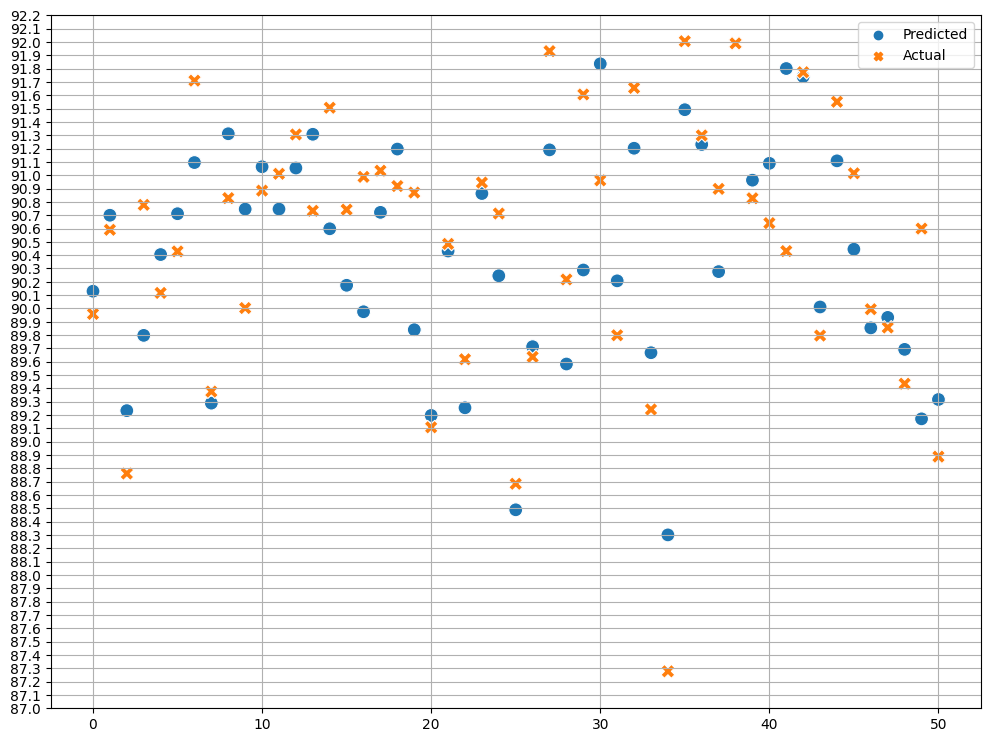

In [8]:
plt.figure(figsize=(12,9))

y_ticks = np.arange(87.0, 92.2, 0.1)
plt.ylim(87.0, 92.2)
plt.yticks(y_ticks)


sns.scatterplot(compare_df, s=100)
plt.grid(True)

# Work Done :)